# Linear regression


In this notebook, we perform linear regression to try and predict the winning time of the mens 100m sprint at the 2012 Olympics, using historical winning times.

Our aim is to use linear regression (one of the simplest models we might use) to demonstrate the whole Machine Learning process: defining a model, optimising the parameters of that model from data (*learning*) and then evaluating the model's performance.

We start by loading the Olympic 100m men's data from the URL below and then copying the first and second columns into the numpy variables x and t.

In [22]:
from IPython.display import IFrame
import urllib
# You only need this line if you haven't cloned the repo...if you have cloned, you'll already have the data
urllib.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')
import numpy as np
# If you have cloned, make sure this is pointing to the correct file, maybe ../data/olympic100m.txt ?
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

## Plotting


It's always useful to start with a plot of the data. I'm using matplotlib but you can use other things too.

Note the *magic* command `%matplotlib inline` which tells the notebook to render the plots in the browser and not to file.

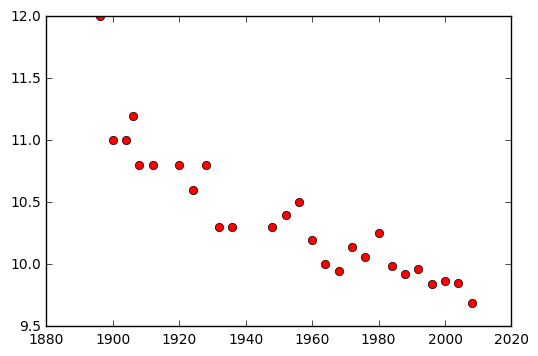

In [8]:
import pylab as plt
%matplotlib inline
plt.plot(x,t,'ro')

## Minismising the loss

Recall that the total loss was given by:

$$ L = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$

which can be interpreted as the total squared error between the data ($t_n$) and the model's prediction ($w_0+w_1x_n$).

One way of defining the **best** model is that one that minimises this error (i.e. the values of $w_0$ and $w_1$ that make $L$ as small as possible). 

To find a minimum we can differentiate the expression with respect to $w_0$ and $w_1$, set the resulting equations to zero and then solve (at a minimum (or maximum) the gradient must be zero).

I'll do this in class, but here is a sketch of it:

In [16]:
IFrame('lin_reg_diff.pdf',width=600,height=300)

the result is that the loss is minimised by:

$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$

and

$$ w_0 = \bar{t} - w_1\bar{x} $$

where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$

We can now compute these quantites, first computing all the mean values we need:

In [18]:
xbar = x.mean()
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.37037037
10.3896296296
3812975.55556
20268.0681481


And now using these to compute $w_0$ and $w_1$:

In [19]:
w1 = (tbar*xbar - xtbar)/(xbar*xbar - xxbar)
w0 = tbar-w1*xbar
print(w0)
print(w1)

36.4164559025
-0.013330885711


## Plotting

Now that we have $w_0$ and $w_1$ we can plot the data.

Note that the way I do this below, is a bit of an overkill but, once we move to nonlinear regression (non-straight lines) we will need to do things this way...

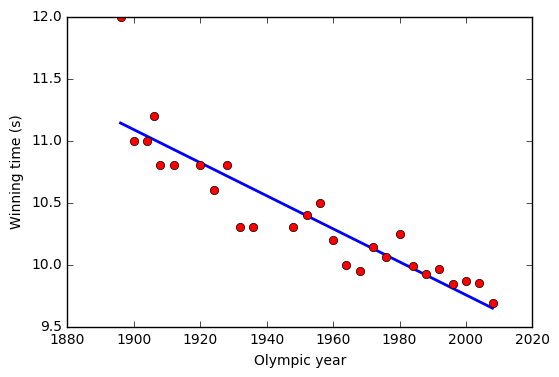

In [20]:
x_test = np.linspace(1896,2008,100)[:,None]
f_test = w0+w1*x_test
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

Phew - it looks like a *good* model!

## Predictions

We can now compute the prediction at 2012 by plugging in $x=2012$ into the model:

In [21]:
win_2012 = w0+w1*2012
print(win_2012)

9.59471385205


So, we predict that the winning time will be 9.5947... seconds...

<h4>Matrix and vector form</h4>
<p>We first defined $\mathbf{w},\mathbf{x}_n$ as:</p>
$$ \mathbf{w} = \left[\begin{array}{c} w_0\\w_1\end{array}\right],~~\mathbf{x}_n = \left[\begin{array}{c} 1 \\ x_n \end{array}\right] $$
and:
$$ \mathbf{t} = \left[\begin{array}{c} t_1\\ t_2\\ \vdots\\ t_N \end{array}\right]$$
and:
$$ \mathbf{X} = \left[\begin{array}{c} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T \end{array}\right] = \left[ \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots \\ 1 & x_N \end{array}\right] $$
The optimal value of $\mathbf{w}$ is then given by:
$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

In [7]:
X = np.hstack((np.ones_like(x),x))
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))
print(w)

[[  3.64164559e+01]
 [ -1.33308857e-02]]


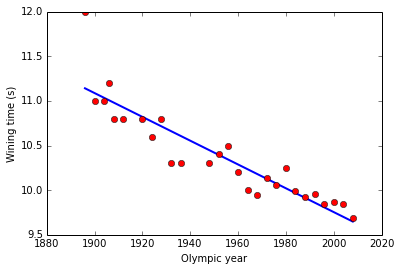

In [8]:
f_test = w[0]+w[1]*x_test
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.xlabel('Olympic year')
plt.ylabel('Wining time (s)')

<h4>Solving linear systems</h4>
<p>To obtaim the optimal value of $\mathbf{w}$ we re-arranged:
$$ \mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
It is actually more efficient to solve this equation than explicitly inverting $\mathbf{X}^T\mathbf{X}$.</p>
<p>To do this we can use `numpy.linalg.solve` which solves equations of the form $\mathbf{A}\mathbf{z} = \mathbf{B}$ for $\mathbf{z}$.</p>

In [9]:
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
print(w)

[[  3.64164559e+01]
 [ -1.33308857e-02]]


<h4>Predicting in vector and matrix notation</h4>
<p>If we construct a test $\mathbf{X}$ object in the same format as $\mathbf{X}$ (we'll call it $\mathbf{X}_{*}$), we can obtain predictions via $\mathbf{X}^*\mathbf{w}$.

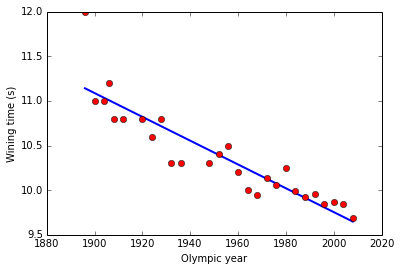

In [10]:
X_test = np.hstack((np.ones_like(x_test),x_test))
f_test = np.dot(X_test,w)
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.xlabel('Olympic year')
plt.ylabel('Wining time (s)')

<p>Or we can make an $\mathbf{x}_{2012}$ object as:
$$ \mathbf{x}_{2012} = \left[\begin{array}{c} 1 \\ 2012 \end{array}\right] $$
and compute the prediction at 2012 as $\mathbf{w}^T\mathbf{x}_{2012}$.</p>

In [11]:
x_2012 = np.zeros(shape=(2,1))
x_2012[0] = 1
x_2012[1] = 2012
f_2012 = np.dot(w.T,x_2012)
print(f_2012)

[[ 9.59471385]]
